# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>

# <span style="color:red">Data Scrapping</span>

In [1]:
from bs4 import BeautifulSoup
import requests

page = requests.get('https://en.wikipedia.org/wiki/Egypt')

page

<Response [200]>

In [2]:
len(page.text)

960572

In [3]:
len(page.content)

964039

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
len(soup.find_all('p'))

208

In [6]:
title = soup.find(id="firstHeading")
print(title.string)

Egypt


In [7]:
print(soup.find_all('p')[7].get_text())

There is evidence of rock carvings along the Nile terraces and in desert oases. In the 10th millennium BCE, a culture of hunter-gatherers and fishers was replaced by a grain-grinding culture. Climate changes or overgrazing around 8000 BCE began to desiccate the pastoral lands of Egypt, forming the Sahara. Early tribal peoples migrated to the Nile River where they developed a settled agricultural economy and more centralised society.[29]



In [8]:
def GetPage(Link,FileName) : 
    page = requests.get(Link)
    soup = BeautifulSoup(page.content, 'html.parser')
    print(f'Number of paragraphs is :  {len(soup.find_all("p"))}')
    
    try : 
        title = soup.find(id="firstHeading")
        print(f'Page title is :   {title.string}')
    except :
        pass
    
    if len(soup.find_all('p')) ==0 : return None
    
    f = open(f"D:\\{FileName}.txt",'w', encoding = 'utf-8')
    
    for i in range(len(soup.find_all('p'))) : 
        f.write(soup.find_all('p')[i].get_text())
        f.write('\n')
        
    f.close()

In [9]:
GetPage("https://en.wikipedia.org/wiki/Al_Ahly_SC", "Al Ahly")

Number of paragraphs is :  94
Page title is :   Al Ahly SC


# <span style="color:red">Word Cloud</span>

In [10]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords

In [11]:
import spacy
nlp = spacy.load('en_core_web_lg')
len(nlp.Defaults.stop_words)

326

In [12]:
WCD = dict()    
def MakeCloud(text, title = 'Word Clouds', w = 15, h = 15):
    global WCD
    plt.figure(figsize=(w,h))
    
    WC = WordCloud(background_color="white",
                   stopwords=set(nlp.Defaults.stop_words)).generate(" ".join([i.lower() for i in text.split()]))
    
    WCD = WC.words_
    plt.imshow(WC)
    plt.axis("off")
    plt.title(title)
    plt.show()    

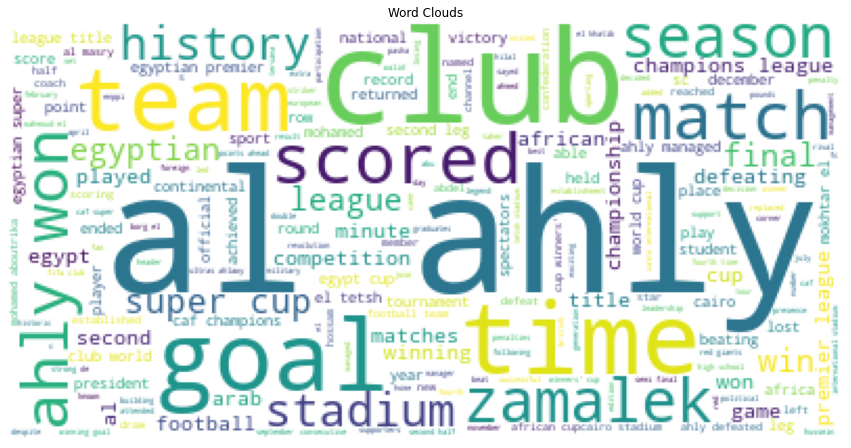

In [13]:
f = open("D:\Al Ahly.txt", "r",  encoding='utf-8')
Alahly = f.read()
MakeCloud(Alahly)

In [14]:
nlp.vocab["al"].is_stop

False

In [15]:
nlp.Defaults.stop_words.add('al')
nlp.vocab['al'].is_stop = True

In [16]:
nlp.vocab['al'].is_stop

True

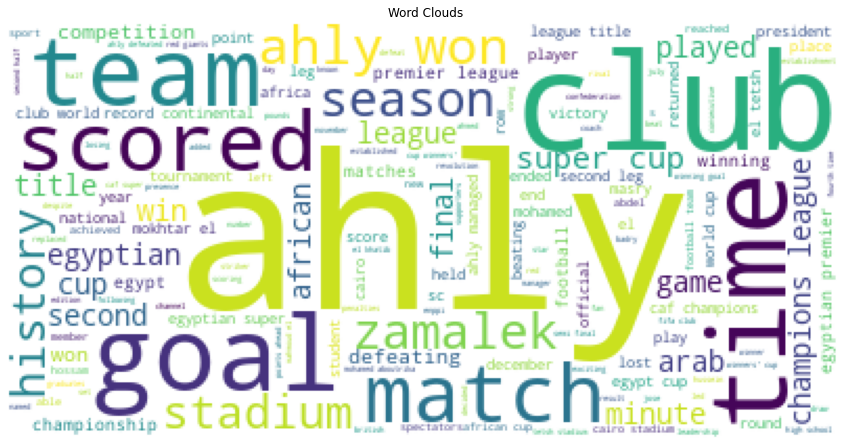

In [17]:
MakeCloud(Alahly)

In [18]:
len(WCD)

200

In [19]:
for k, v in zip(list(WCD.keys())[:22], list(WCD.values())[:22]):
    print(f'word: {k}'.ljust(22), f'repetition rate: {v}') #'\t\t',

word: ahly             repetition rate: 1.0
word: club             repetition rate: 0.6484848484848484
word: time             repetition rate: 0.36363636363636365
word: goal             repetition rate: 0.3515151515151515
word: team             repetition rate: 0.296969696969697
word: scored           repetition rate: 0.296969696969697
word: match            repetition rate: 0.2727272727272727
word: ahly won         repetition rate: 0.23636363636363636
word: zamalek          repetition rate: 0.22424242424242424
word: season           repetition rate: 0.21818181818181817
word: history          repetition rate: 0.18787878787878787
word: stadium          repetition rate: 0.18787878787878787
word: super cup        repetition rate: 0.18181818181818182
word: league           repetition rate: 0.1696969696969697
word: final            repetition rate: 0.1696969696969697
word: win              repetition rate: 0.16363636363636364
word: egyptian         repetition rate: 0.15757575757575756
word:

# <span style="color:red">Word Cloud using a given shape</span>

In [20]:
import numpy as np
from PIL import Image

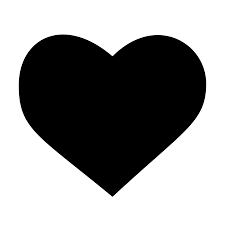

In [22]:
TheMask = Image.open(r'D:\Projects\NLP\Word Cloud\Mask.png')
TheMask

#### To get similar images, Just write in the search engine (heart silhouette).

In [23]:
def WordCloudMask(Text, ImagePath, ContourWidth=2,
                  save=False, ImageName = '_Ayad_', SavePath = 'D:\\' ):
    
    Mask = np.array(Image.open(ImagePath))
    
    def transform_format(val):
        if val == 0:
            return 255
        else:
            return val
        
    TransformedMask = np.ndarray((Mask.shape[0], Mask.shape[1]), np.int32)
    
    for i in range(len(Mask)):
        TransformedMask[i] = list(map(transform_format, Mask[i]))
        
    wc = WordCloud( 
                    background_color="red", max_words=220, 
                    mask=TransformedMask,
                    contour_width=ContourWidth, contour_color='black'
                    )
    
    wc.generate(Text)
    plt.figure(figsize=[20,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    if save == True: wc.save(SavePath + ImageName + ".png" )

    return None

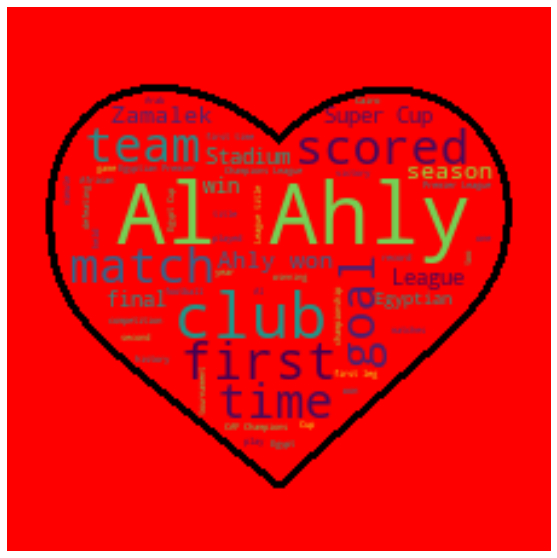

In [24]:
f = open("D:\Al Ahly.txt", "r",  encoding='utf-8')

Text = f.read()

WordCloudMask(Text, r'D:\Projects\NLP\Word Cloud\Mask.png')

# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>